In [1]:
#https://www.datacamp.com/community/tutorials/feature-selection-python?irclickid=VeXTYcVJ3xyLUZKzN30x7Q3FUkGwSCSRxzwvRQ0&irgwc=1

In [2]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

data = dataframe
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# Chi-Squared test belongs the class of filter methods

In [5]:
import numpy as np
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


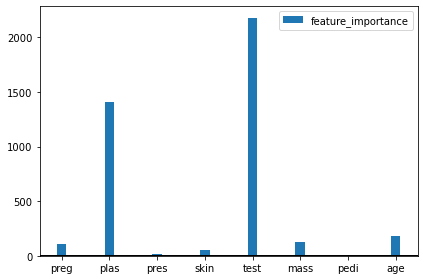

In [6]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
compoents0  =fit.scores_

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x, compoents0, width, label='feature_importance')

threshold = compoents0[6]
plt.axhline(y=threshold,linewidth=1, color='k')

plt.xticks(x, labels)

ax.legend()
fig.tight_layout()

plt.show()

In [7]:
#plas, test, mass, and age

# Recursive Feature Elimination 

In [9]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#You can see that RFE chose the top 3 features as preg, mass, and pedi

# Ridge regression is a regularization technique and an embedded feature selection techniques as well

In [11]:
# First things first
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7


In [13]:
# features with large absolute weights are significant features

# 0.021 * X0       0.013 * X5       0.145 * X6
#['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']